In [1]:
from datetime import datetime
import json

In [2]:
#https://developer.twitter.com/en/portal/projects
#https://developer.twitter.com/en/docs/authentication/api-reference/token
#https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets

In [3]:
#CREDENCIAIS DA API TWITTER

consumer_key = 'szcucdEDZ35uEdB5kIxVQEVH7'
consumer_secret = 'JYGDTvdk3RxsZIMlxt3cVjcWn9JSyrHEgHmmYvpFDqYRANrD2D'

In [4]:
access_token = '1534665835368878080-JtFSlBe1Zxv9Uy1uSVkfBusrGhhiAe'
access_token_secret = 'ktb3wPRmPLgE7ZWSVikVOIY544C9sFYOLHTu6SnicW6Dn'

In [5]:
#pip install TwitterSearch

In [6]:
import os

if os.path.exists("tweet.json"):
    os.remove("tweet.json")

## Esse próximo código demora bastante.
### Rodar ele várias vezes pode causar um erro de connection timeout 

In [7]:
from TwitterSearch import *

try:
    
    ts = TwitterSearch( #Objeto TwitterSearch
        consumer_key = consumer_key,
        consumer_secret= consumer_secret,
        access_token = access_token,
        access_token_secret = access_token_secret
    )
    
    tso = TwitterSearchOrder() #instancia o Objeto
    tso.set_keywords(['bolsonaro', 'Bolsonaro'], or_operator=True)
    tso.set_language('pt')
    
    for tweet in ts.search_tweets_iterable(tso): #pegando o metadata e armazenando em variáveis
        
        created_at = tweet['created_at']
        user_id = tweet['id_str']
        texto = tweet['text']
        
        with open("tweet.json", "a+") as output: #criando o arquivo json: r+ -> sobrescrever; a+ -> append e cria se nao existir
            
            data = {
                "created_at":created_at,
                "User_id":user_id,
                "tweet":texto
            }
            
            #print(data)
            output.write("{}\n".format(json.dumps(data)))
            
except TwitterSearchException as e: #caso dê algum erro no caminho
    print(e)

In [8]:
#Cuidado ao rodar essas linhas pois podem demorar demais
#print('created_at: ', tweet['created_at'], 'User_id: ', tweet['id_str'], 'Tweet: ', tweet['text'])
#print('Tweet: ', tweet['text'])

In [9]:
import pandas as pd

df = pd.read_json('tweet.json',lines = True)

In [10]:
df.shape

(18000, 3)

In [11]:
df.head(15)

,created_at,User_id,tweet
0,2022-06-11 20:21:31+00:00,1535718896149340160,@SouzaAc7070 @Angolonelson @folha Mas bem dife...
1,2022-06-11 20:21:31+00:00,1535718895130132480,RT @bellanna: A liderança da Lagoinha Orlando ...
2,2022-06-11 20:21:31+00:00,1535718894811455488,RT @antoniotabet: Toda reeleição foi ruim para...
3,2022-06-11 20:21:30+00:00,1535718892311658496,RT @thaispsic: Para reeleger o Presidente Bols...
4,2022-06-11 20:21:30+00:00,1535718891833462784,RT @FranzeNicolina: Bolsonaro é um fenômeno!!\...
5,2022-06-11 20:21:30+00:00,1535718890524794880,RT @EdinhoBandeira: 👏🙂🇧🇷...O presidente Jair B...
6,2022-06-11 20:21:30+00:00,1535718889966948352,RT @taoquei1: Bolsonaro em Orlando! 🇧🇷 https:/...
7,2022-06-11 20:21:29+00:00,1535718888628965376,"RT @PedroRonchi2: Allan dos Santos, foragido d..."
8,2022-06-11 20:21:29+00:00,1535718888264151040,RT @DavidManoeldeSa: Faltando 335 para 6 k. Va...
9,2022-06-11 20:21:29+00:00,1535718888067022848,Augustin quando o bolsonaro for e a michelle f...


In [12]:
df.drop_duplicates(['tweet'], inplace=True)

In [13]:
df.shape

(4561, 3)

In [14]:
import nltk
#nltk.download('stopwords')

In [15]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return(" ".join(palavras))

## Tokenização do Dataframe

In [16]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

In [17]:
tweets_tokenized = [tweet_tokenizer.tokenize(tweet) for tweet in df.tweet]

In [18]:
tweets_tokenized[:5]

[['@SouzaAc7070',
  '@Angolonelson',
  '@folha',
  'Mas',
  'bem',
  'diferente',
  'do',
  'Bolsonaro',
  ',',
  'rs',
  '.',
  '😂',
  'Enquanto',
  'um',
  'percebeu',
  'o',
  'avanço',
  'da',
  'doença',
  'e',
  'v',
  '…',
  'https://t.co/pSY7YjiIc0'],
 ['RT',
  '@bellanna',
  ':',
  'A',
  'liderança',
  'da',
  'Lagoinha',
  'Orlando',
  '(',
  'que',
  'recebe',
  'hj',
  'Jair',
  'Bolsonaro',
  ')',
  'contando',
  'que',
  'o',
  'serviço',
  'secreto',
  'americano',
  'ficou',
  'chocado',
  'com',
  'o',
  'p',
  '…'],
 ['RT',
  '@antoniotabet',
  ':',
  'Toda',
  'reeleição',
  'foi',
  'ruim',
  'para',
  'o',
  'país',
  '.',
  'O',
  '2º',
  'governo',
  'FHC',
  'foi',
  'pior',
  'que',
  'o',
  'primeiro',
  '.',
  'O',
  '2º',
  'governo',
  'Lula',
  'foi',
  'pior',
  'que',
  'o',
  'primeiro',
  '.',
  '…'],
 ['RT',
  '@thaispsic',
  ':',
  'Para',
  'reeleger',
  'o',
  'Presidente',
  'Bolsonaro',
  'não',
  'podemos',
  'só',
  'ficar',
  'na',
  'interne

## Pre processamento dos dados

In [19]:
import re #regular expressions

In [20]:
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+","",instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [21]:
tweets = [Preprocessing(i) for i in df.tweet]

In [22]:
tweets[:10]

['@souzaac7070 @angolonelson @folha bem diferente bolsonaro, rs 😂 enquanto percebeu avanço doença v…',
 'rt @bellanna liderança lagoinha orlando (que recebe hj jair bolsonaro contando serviço secreto americano ficou chocado p…',
 'rt @antoniotabet toda reeleição ruim país 2º governo fhc pior primeiro 2º governo lula pior primeiro…',
 'rt @thaispsic reeleger presidente bolsonaro podemos ficar internet viu!!!',
 'rt @franzenicolina bolsonaro fenômeno!! presidente aclamado ruas orlando participa motociata',
 'rt @edinhobandeira 👏🙂🇧🇷o presidente jair bolsonaro vai inaugurar, neste sábado (11, viceconsulado brasil orlando, flórida…',
 'rt @taoquei1 bolsonaro orlando! 🇧🇷',
 'rt @pedroronchi2 allan santos, foragido justiça, tá tirando onda motociata eua lado bolsonaro porque sabe bandido…',
 'rt @davidmanoeldesa faltando 335 6 k vamos completar isso? vejam perfil sdv todos seguem pouco',
 'augustin bolsonaro michelle ficar sozinha']

In [23]:
df['preprocessed'] = tweets
df.head()

,created_at,User_id,tweet,preprocessed
0,2022-06-11 20:21:31+00:00,1535718896149340160,@SouzaAc7070 @Angolonelson @folha Mas bem dife...,@souzaac7070 @angolonelson @folha bem diferent...
1,2022-06-11 20:21:31+00:00,1535718895130132480,RT @bellanna: A liderança da Lagoinha Orlando ...,rt @bellanna liderança lagoinha orlando (que r...
2,2022-06-11 20:21:31+00:00,1535718894811455488,RT @antoniotabet: Toda reeleição foi ruim para...,rt @antoniotabet toda reeleição ruim país 2º g...
3,2022-06-11 20:21:30+00:00,1535718892311658496,RT @thaispsic: Para reeleger o Presidente Bols...,rt @thaispsic reeleger presidente bolsonaro po...
4,2022-06-11 20:21:30+00:00,1535718891833462784,RT @FranzeNicolina: Bolsonaro é um fenômeno!!\...,rt @franzenicolina bolsonaro fenômeno!! presid...


## Remover caracteres indesejados

In [24]:
from bs4 import BeautifulSoup

def prep_tweets(tweet):
    
    tweet = BeautifulSoup(tweet, "html.parser").get_text() #remove links
    tweet = re.sub(r"[^a-zA-Zà-úÀ-Ú0-9]"," ", tweet.lower())
    #tweet = tweet_tokenizer.tokenize(tweet)
    
    return tweet

In [25]:
df.head()

,created_at,User_id,tweet,preprocessed
0,2022-06-11 20:21:31+00:00,1535718896149340160,@SouzaAc7070 @Angolonelson @folha Mas bem dife...,@souzaac7070 @angolonelson @folha bem diferent...
1,2022-06-11 20:21:31+00:00,1535718895130132480,RT @bellanna: A liderança da Lagoinha Orlando ...,rt @bellanna liderança lagoinha orlando (que r...
2,2022-06-11 20:21:31+00:00,1535718894811455488,RT @antoniotabet: Toda reeleição foi ruim para...,rt @antoniotabet toda reeleição ruim país 2º g...
3,2022-06-11 20:21:30+00:00,1535718892311658496,RT @thaispsic: Para reeleger o Presidente Bols...,rt @thaispsic reeleger presidente bolsonaro po...
4,2022-06-11 20:21:30+00:00,1535718891833462784,RT @FranzeNicolina: Bolsonaro é um fenômeno!!\...,rt @franzenicolina bolsonaro fenômeno!! presid...


In [26]:
df['cleaned_tweets'] = [prep_tweets(tweet) for tweet in df.preprocessed]
df.head()

C:\Users\User\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,created_at,User_id,tweet,preprocessed,cleaned_tweets
0,2022-06-11 20:21:31+00:00,1535718896149340160,@SouzaAc7070 @Angolonelson @folha Mas bem dife...,@souzaac7070 @angolonelson @folha bem diferent...,souzaac7070 angolonelson folha bem diferent...
1,2022-06-11 20:21:31+00:00,1535718895130132480,RT @bellanna: A liderança da Lagoinha Orlando ...,rt @bellanna liderança lagoinha orlando (que r...,rt bellanna liderança lagoinha orlando que r...
2,2022-06-11 20:21:31+00:00,1535718894811455488,RT @antoniotabet: Toda reeleição foi ruim para...,rt @antoniotabet toda reeleição ruim país 2º g...,rt antoniotabet toda reeleição ruim país 2 g...
3,2022-06-11 20:21:30+00:00,1535718892311658496,RT @thaispsic: Para reeleger o Presidente Bols...,rt @thaispsic reeleger presidente bolsonaro po...,rt thaispsic reeleger presidente bolsonaro po...
4,2022-06-11 20:21:30+00:00,1535718891833462784,RT @FranzeNicolina: Bolsonaro é um fenômeno!!\...,rt @franzenicolina bolsonaro fenômeno!! presid...,rt franzenicolina bolsonaro fenômeno presid...


## Vamos contar a quantidade de palavras de cada tweet

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [28]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df.cleaned_tweets)

In [29]:
#cv.get_feature_names()

In [30]:
#count_matrix.toarray()

In [31]:
#Dataframe
word_count = pd.DataFrame(cv.get_feature_names(), columns = ['word'])

# Soma as palavras e converte em lista
word_count["count"] = count_matrix.sum(axis = 0).tolist()[0]
word_count = word_count.sort_values("count", ascending = False).reset_index(drop = True)

#Palavras mais usadas
word_count[:30]

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
0,bolsonaro,3738
1,rt,1923
2,presidente,598
3,brasil,544
4,orlando,437
5,eua,375
6,lula,332
7,motociata,327
8,vai,291
9,via,203


In [72]:
word_count = word_count.drop(word_count[word_count.word == 'rt'].index) #Tirando o rt de 'retweet' dos dados...

### Fazendo o histograma

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
word_count[["word","count"]]

,word,count
0,bolsonaro,3738
2,presidente,598
3,brasil,544
4,orlando,437
5,eua,375
...,...,...
10660,lordgaldino,1
10661,lopez,1
10662,controvérsias,1
10663,contém,1


In [76]:
#Vamos tirar a palavra 'bolsonaro' pois ela é praticamente um outlier nos dados.... é quase 5 vezes mais que o segundo lugar
word_count = word_count.drop(word_count[word_count.word == 'bolsonaro'].index)

## várias maneiras de plotar

In [91]:
#ax = word_count[["count"]].plot(figsize=(12,5), kind = 'bar')
#ax.set_xticklabels(word_count["word"])
#plt.savefig('figure.pdf', format='pdf', transparent = True, dpi = 300)

          word  count
2   presidente    598
3       brasil    544
4      orlando    437
5          eua    375
6         lula    332
7    motociata    327
8          vai    291
9          via    203
10        jair    188
11     governo    184


(array([    0,     1,     2, ..., 10660, 10661, 10662]),
 [Text(0, 0, 'presidente'),
  Text(1, 0, 'brasil'),
  Text(2, 0, 'orlando'),
  Text(3, 0, 'eua'),
  Text(4, 0, 'lula'),
  Text(5, 0, 'motociata'),
  Text(6, 0, 'vai'),
  Text(7, 0, 'via'),
  Text(8, 0, 'jair'),
  Text(9, 0, 'governo'),
  Text(10, 0, 'pra'),
  Text(11, 0, 'jairbolsonaro'),
  Text(12, 0, 'youtube'),
  Text(13, 0, 'povo'),
  Text(14, 0, 'diz'),
  Text(15, 0, 'flórida'),
  Text(16, 0, '2022'),
  Text(17, 0, 'gente'),
  Text(18, 0, 'biden'),
  Text(19, 0, 'vc'),
  Text(20, 0, 'mundo'),
  Text(21, 0, 'faz'),
  Text(22, 0, 'ser'),
  Text(23, 0, 'estados'),
  Text(24, 0, 'unidos'),
  Text(25, 0, 'pessoas'),
  Text(26, 0, 'país'),
  Text(27, 0, 'turno'),
  Text(28, 0, '11'),
  Text(29, 0, 'contra'),
  Text(30, 0, 'aqui'),
  Text(31, 0, 'vamos'),
  Text(32, 0, 'stf'),
  Text(33, 0, 'oxigênio'),
  Text(34, 0, 'primeiro'),
  Text(35, 0, 'agora'),
  Text(36, 0, 'tá'),
  Text(37, 0, 'tudo'),
  Text(38, 0, 'veja'),
  Text(39, 0

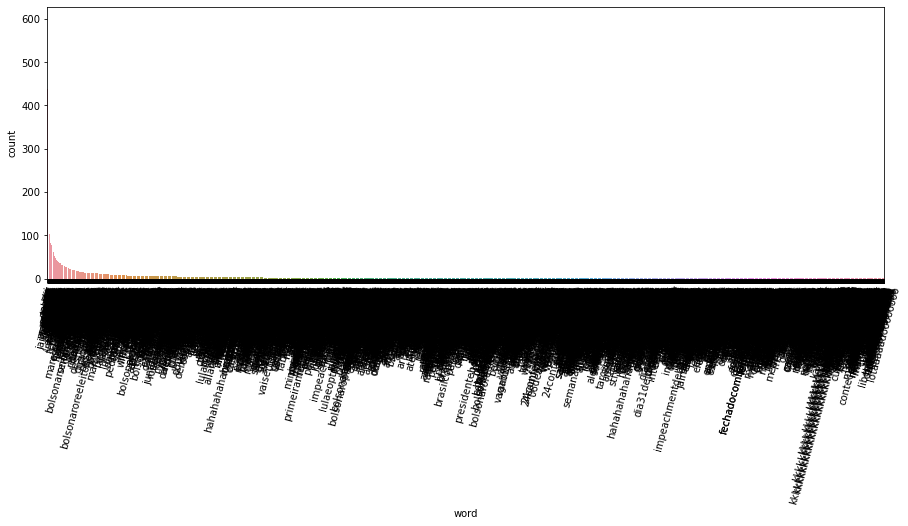

In [114]:
#plt.figure(figsize=(15,5))
#word_order = word_count['word'].head(10).index
#print(word_count[["word","count"]].head(10))
#sns.barplot(data=word_count, x='word', y='count')

<AxesSubplot:xlabel='word', ylabel='count'>

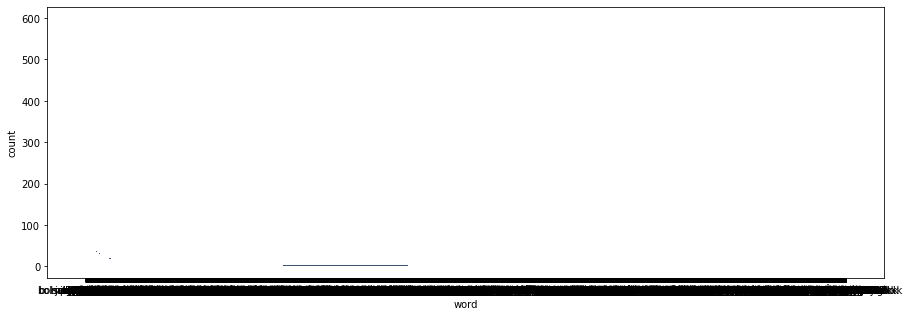

In [116]:
plt.figure(figsize=(15,5))
sns.histplot(data=word_count, x='word', y='count')